# Disaster Tweet Analyzer

### Import Libraries


In [27]:
import pandas as pd
import requests
import json
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KAUSHAL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KAUSHAL/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data Acquisition from CSV File

In [28]:
# Load the dataset from a CSV file
data = pd.read_csv('tweets.csv')  
data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [30]:
data.describe()

,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


## Data Overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB
None
                 id        target
count  11370.000000  11370.000000
mean    5684.500000      0.185928
std     3282.380615      0.389066
min        0.000000      0.000000
25%     2842.250000      0.000000
50%     5684.500000      0.000000
75%     8526.750000      0.000000
max    11369.000000      1.000000
target
0    9256
1    2114
Name: count, dtype: int64


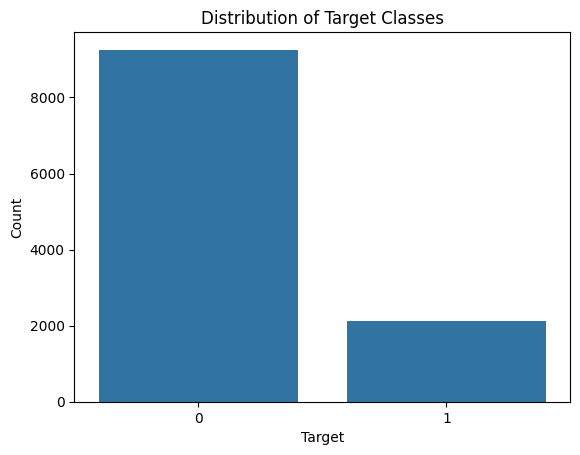

In [31]:
# Get basic information about the dataset
print(data.info())  # Display the information about data types and non-null counts
print(data.describe())  # Get a statistical summary of the numeric columns
print(data['target'].value_counts())  # Count the occurrences of each target class

# Visualize the distribution of target classes
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Classes')
plt.xlabel('Target')

plt.ylabel('Count')
plt.show()


### Data Cleaning Functions

In [32]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    return text


# Clean the 'text' column
data['text'] = data['text'].apply(clean_text)


### Remove Stopwords

In [33]:
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_words)  # Rejoin words into a string

# Apply the stopword removal function
data['text'] = data['text'].apply(remove_stopwords)


### Lemmatization

In [34]:
# Function to lemmatize words
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()  # Split the text into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize each word
    return ' '.join(lemmatized_words)  # Rejoin words into a string

# Apply the lemmatization function
data['text'] = data['text'].apply(lemmatize_text)


### Remove Duplicates

In [35]:
# Remove duplicate tweets
data = data.drop_duplicates(subset='text', keep='first')  # Keep the first occurrence
print(f'Duplicates removed: {data.shape[0]}')  # Display the number of remaining rows


Duplicates removed: 10821


### Text Length Analysis

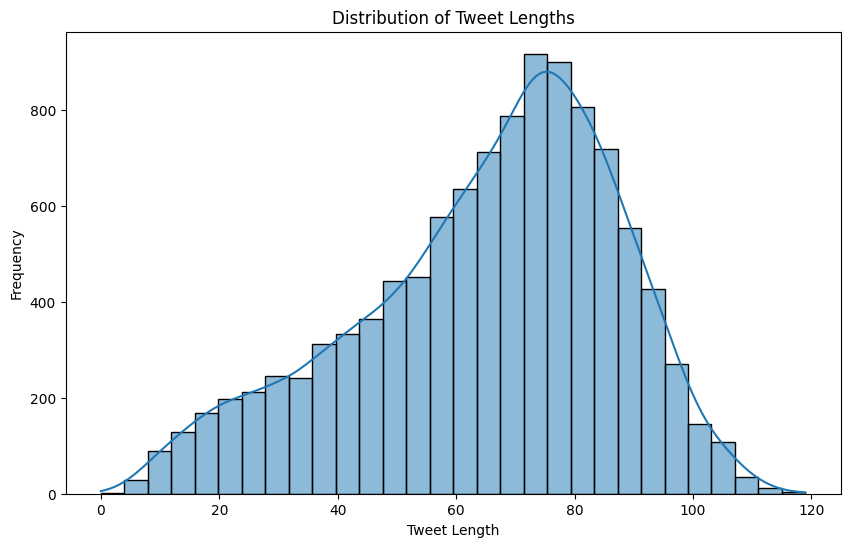

In [36]:
# Create a new column for the length of each tweet
data['text_length'] = data['text'].apply(len)

# Visualize the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


### Handle Missing Values

In [37]:
# Check for missing values
print(data.isnull().sum())  # Display the count of missing values in each column

# Optionally, you can drop missing values or fill them
data = data.dropna(subset=['text'])  # Drop rows where 'text' is missing
print(f'Missing values handled. Remaining rows: {data.shape[0]}')


id                0
keyword           0
location       3290
text              0
target            0
text_length       0
dtype: int64
Missing values handled. Remaining rows: 10821


In [38]:
data.head()

,id,keyword,location,text,target,text_length
0,0,ablaze,NaN,communal violence bhainsa telangana stone pelt...,1,86
1,1,ablaze,NaN,telangana section imposed bhainsa january clas...,1,76
2,2,ablaze,New York City,arsonist set car ablaze dealership,1,34
4,4,ablaze,NaN,lord jesus love brings freedom pardon fill hol...,0,73
5,5,ablaze,OC,child chinese tweet would gone viral social me...,0,87


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10821 entries, 0 to 11369
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10821 non-null  int64 
 1   keyword      10821 non-null  object
 2   location     7531 non-null   object
 3   text         10821 non-null  object
 4   target       10821 non-null  int64 
 5   text_length  10821 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 591.8+ KB


### Save the Cleaned Data

In [40]:
data.to_csv('cleaned_disaster_tweets.csv', index=False)

In [41]:
# Load the cleaned dataset from the CSV file
cleaned_data = pd.read_csv('cleaned_disaster_tweets.csv')

# Display the first few rows of the cleaned dataset
cleaned_data.head()

,id,keyword,location,text,target,text_length
0,0,ablaze,NaN,communal violence bhainsa telangana stone pelt...,1,86
1,1,ablaze,NaN,telangana section imposed bhainsa january clas...,1,76
2,2,ablaze,New York City,arsonist set car ablaze dealership,1,34
3,4,ablaze,NaN,lord jesus love brings freedom pardon fill hol...,0,73
4,5,ablaze,OC,child chinese tweet would gone viral social me...,0,87


## Insights

1. **Target Class Distribution**: 
   The visual distribution of the target classes provides insights into the balance of the dataset. An imbalanced dataset may require special techniques during model training .

2. **Text Cleaning Importance**: 
   Cleaning text data significantly improves model performance by reducing noise, allowing the model to focus on relevant features.

3. **Stopwords and Lemmatization**: 
   Removing stopwords and lemmatizing words helps in reducing dimensionality and retaining the meaning of the words.

4. **Text Length Analysis**: 
   Analyzing the length of tweets can help in understanding the nature of tweets related to disasters. Longer tweets might provide more context, while shorter tweets may be more opinionated.
"""